# Primeros pasos con OpenCV

## Requisitos
* [Python > 3.10](https://www.python.org/)
> Los módulos de Python necesarios pueden instalarse de dos modos:
> * Usando el gestor de paquetes del sistema operativo Linux
> * Usando el grator de paquetes propio de Pyhton
> 
> Es conveniente NO mezclar los dos métodos de instalación y además hay que considerar que se pueden instalar para un usuario concreto (dicho usuario hará la instalación) o para todos los usuarios (la instalación la hará el administrador del S.O.)
>  
> Si se decide usar el gestor de paquetes de Python, es necesario que en la instalación de Python se incluya el módulo **pip** y éste debe actualizarse periódicamente desde línea de comandos...
>> 
>        python -m pip install --upgrade pip
> 
> Se van a dar instrucciones de instalación de módulos mediante **pip**.
* [OpenCV > 4.7](https://opencv.org/)
>        pip install opencv-contrib-python
> OpenCV instalará automáticamente el módulo [NumPy](https://numpy.org/) que necesita para la representación matricial de las imágenes.
* [Matplotlib > 3.7](https://matplotlib.org/)
>        pip install matplotlib
> 

Las funcionalidades de **OpenCV** se encuentran en el módulo de Python *cv2*. Aunque en la [documentación](https://docs.opencv.org/4.x/d1/dfb/intro.html#autotoc_md130) se menciona el espacio de nombres **cv**, cuando se comenzó a usar [NumPy](https://numpy.org/) se creó un nuevo espacio de nombres **cv2** que es el que usaremos siempre.
Al acceder a la documentación de OpenCV, por ejemplo para la función [**imshow**](https://docs.opencv.org/4.x/d7/dfc/group__highgui.html#ga453d42fe4cb60e5723281a89973ee563), veremos que la API de Python nos indica **cv**.imshow(	winname, mat	). En su lugar siempre usaremos el espacio de nombres **cv2**, es decir, **cv2**.imshow(	winname, mat	)

In [1]:
import cv2

OpenCV almacena las imágenes en matrices definidas en el módulo [*numpy*](https://numpy.org/doc/stable/reference/index.html#reference). Habitualmente se carga el módulo asignándole el alias *np*

In [2]:
import numpy as np

Aunque OpenCV puede mostrar imágenes, el módulo [*matplotlib*](https://matplotlib.org/stable/api/index) ofrece una gran versatilidad en la representación gráfica de imágenes, gráficas, etc. Usaremos matplotlib principalmente cuando necesitemos mostrar histogramas y cuando queramos mostrar varias imágenes en disposición matricial. En este documento se usa matplotlib para mostrar las imágenes en el documento en vez de en una ventana emergente.

Usaremos el submódulo *pyplot* que suele cargarse con el alias *plt*

In [3]:
# Esta línea solo es necesaria para que matplotlib pueda mostrar resultados en jupyter. No es nedcesaria en un uso normal.
%matplotlib inline

In [4]:
from matplotlib import pyplot as plt

## Leer imágenes de fichero
Para la lectura de una imagen del disco usaremos la función [imread](https://docs.opencv.org/4.x/d4/da8/group__imgcodecs.html#gab32ee19e22660912565f8140d0f675a8) de la que hablaremos en detalle posteriormente.

In [5]:
baboon = cv2.imread("media/baboon.jpg")

## Mostrar imágenes en ventana emergente
Para mostrar una imagen OpenCV dispone de la función [**imshow(	winname, mat	)**](https://docs.opencv.org/4.x/d7/dfc/group__highgui.html#ga453d42fe4cb60e5723281a89973ee563)

El segundo argumento de dicha función es la imagen que se quiere mostrar. El primer argumento es el nombre de la ventana en la que se mostrará la imagen.

En caso de que no exista dicha ventana, esta se creará automáticamente. Si queremos crear la ventana explícitamente podemos usar la función [**namedWindow**](https://docs.opencv.org/4.x/d7/dfc/group__highgui.html#ga5afdf8410934fd099df85c75b2e0888b)

Cualquier ventana creada es necesario destruirla al terminar de usarla mediante [**destroyWindow**](https://docs.opencv.org/4.x/d7/dfc/group__highgui.html#ga851ccdd6961022d1d5b4c4f255dbab34) o [**destroyAllWindows**](https://docs.opencv.org/4.x/d7/dfc/group__highgui.html#ga6b7fc1c1a8960438156912027b38f481)

Para no destruir la ventana hasta que el usuario haya terminado se introduce una pausa mediante [**waitKey**](https://docs.opencv.org/4.x/d7/dfc/group__highgui.html#ga5628525ad33f52eab17feebcfba38bd7) que espera a que el usuario pulse una tecla. Si se omite el argumento se toma el valor por defecto 0 que representa una pausa indefinida. Cualquier otro valor numérico representa los milisegundos de espera. Si durante la pausa se pulsa una tecla entonces la función devuelve el código de la tecla pulsada. En caso contrario devuelve -1

**ALERTA:** Si se cierra la ventana (pulsando el botón X de cierre de ventanas) mientras se hace una pausa indefinida perdemos la opción de que se capture la pulsación de una tecla por lo que el proceso se quedará indefinidamente bloqueado. Para prevenir esta situación se puede comprobar periódicamente el estado de la ventana mediante [**getWindowProperty**](https://docs.opencv.org/4.x/d7/dfc/group__highgui.html#gaaf9504b8f9cf19024d9d44a14e461656). 

In [6]:
cv2.imshow("Mandril", baboon)
while True:
    if cv2.waitKey(50) > 0:  #Pausa de 50 ms. Si durante la pause se pulsa cualquier tecla...
        cv2.destroyWindow("Mandril")   #...se cierra la ventana.
        break
    if cv2.getWindowProperty("Mandril", cv2.WND_PROP_VISIBLE) < 1: #Si la ventana ya no es visible (fue cerrada), salimos del bucle
        break

Podemos definir una función que presente dicha funcionalidad para que sea más cómodo usarla en el resto del documento.

In [7]:
# Esta función será incorporada a cuia.py para poder ser usada en el futuro
def popup(titulo, imagen):
    cv2.imshow(titulo, imagen)
    while True:
        if cv2.waitKey(10) > 0:
            cv2.destroyWindow(titulo)
            break
        elif cv2.getWindowProperty(titulo, cv2.WND_PROP_VISIBLE) < 1:
            break

In [8]:
mariposa = cv2.imread("media/butterfly.jpg")

In [9]:
popup("MARIPOSA", mariposa)

Para que la función **popup** pueda ser usada desde otros documentos, vamos a incorporarla a la biblioteca **cuia.py**. En cualquier documento podremos hacer **import cuia** y acceder a la función mediante **cuia.popup**

## Mostrar imágenes incrustadas en este documento
Para que las imágenes sean mostradas incrustadas en este documento podemos usar la función [**imshow**](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) de  **matplotlib** aunque comprobaremos que los colores han cambiado...

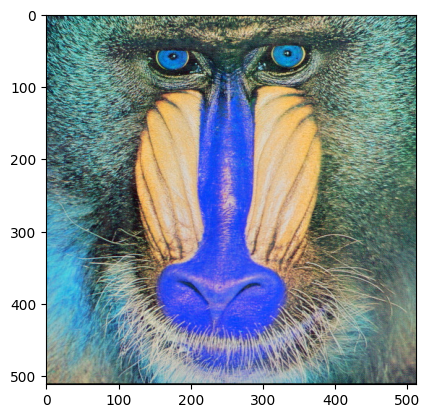

In [10]:
plt.imshow(baboon)

La diferencia en los colores se debe a que matplotlib espera que la imagen use el espacio de color RGB (en ese orden) mientras que OpenCV usa el orden BGR (Esto es debido a que cuando se creó OpenCV no estaba ampliamente aceptado el orden RGB sino que más bien era BGR el ordenamiento más popular).
OpenCV ofrece la posibilidad de convertir el espacio de color de una imagen entre RGB, BGR y otros muchos espacios de color adicionales mediante la función [**cvtColor**](https://docs.opencv.org/4.x/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab). El tipo de conversión se indica mediante una constante **cv2.COLOR_{DESDE}2{HASTA}**, donde {DESDE} y {HASTA} representan los códigos de un espacio de color. Por ejemplo, para convertir del espacio de color BGR, que es el que usa OpenCV, al espacio de color RGB que es el que usa Matplotlib, el código de conversión será **cv2.COLOR_BGR2RGB**
Todos los códigos de conversión se pueden consultar [aquí](https://docs.opencv.org/4.x/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0)

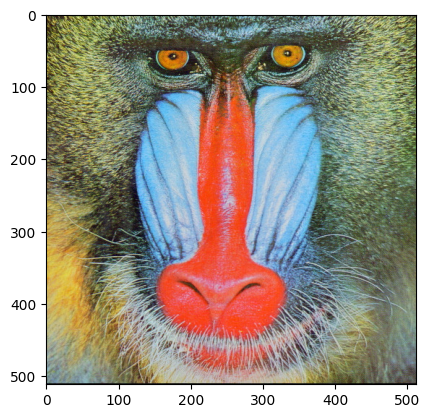

In [11]:
plt.imshow( cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB) )

Para hacer más cómoda la representación de imágenes incrustadas en los documentos definiremos una función que incluiremos en **cuia.py** y que hará automáticamente la convesión. Además de algunos modificadores de Matplotlib usados para mostrar la imagen correctamente, se emplea la propiedad [shape](https://numpy.org/doc/stable/reference/generated/numpy.shape.html) para conocer el número de filas, columnas y bandas de la imagen.

In [12]:
# Esta función será incorporada a cuia.py para poder ser usada en el futuro
def plot(image):
    if len(image.shape)==2:
        h, w = image.shape
        c = 1
    else:
        h, w, c = image.shape
    px = 1/plt.rcParams['figure.dpi']  
    plt.subplots(figsize=(h*px, w*px), layout='tight')
    plt.axis('off')
    if c==4:
        plt.imshow( cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA) )
    elif c==1:
        plt.imshow( image, cmap='gray' )
    else:
        plt.imshow( cv2.cvtColor(image, cv2.COLOR_BGR2RGB) )

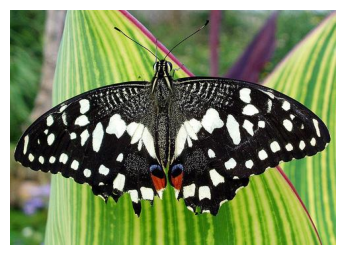

In [13]:
plot(mariposa)

## Leer frames de un video
OpenCV es también capaz de extraer los frames individuales de una secuencia de video mediante [**VideoCapture**](https://docs.opencv.org/4.x/d8/dfe/classcv_1_1VideoCapture.html)

El argumento puede ser la ruta de un fichero de video, la ruta de un dispositivo (ej. /dev/video0), la url de un stream de video o bien un número entero que identifique la cámara (numeradas empezando en 0 para la primera) de la que se obtendrán los frames.

El resultado será un objeto que nos permitirá trabajar con el video. El recurso ha de ser liberado tras su uso mediante una llamada al método [**release**](https://docs.opencv.org/4.x/d8/dfe/classcv_1_1VideoCapture.html#afb4ab689e553ba2c8f0fec41b9344ae6)

Inicialmente emplearemos los métodos [**isOpened**](https://docs.opencv.org/4.x/d8/dfe/classcv_1_1VideoCapture.html#a9d2ca36789e7fcfe7a7be3b328038585) para comprobar si se pudo acceder al video, y [**read**](https://docs.opencv.org/4.x/d8/dfe/classcv_1_1VideoCapture.html#a473055e77dd7faa4d26d686226b292c1) para obtener el siguiente frame.

La reproducción del video puede hacerse mediante un bucle que extraiga frames del video y los muestre en una ventana hasta que el usuario pulse una tecla (método [**waitKey**](https://docs.opencv.org/4.x/d7/dfc/group__highgui.html#ga5628525ad33f52eab17feebcfba38bd7)), la ventana haya sido cerrada (lo cual es comprobado mediante el método [**getWindowProperty**](https://docs.opencv.org/4.x/d7/dfc/group__highgui.html#gaaf9504b8f9cf19024d9d44a14e461656)) o no se puedan obtener más frames (en cuyo caso el método [read](https://docs.opencv.org/4.x/d8/dfe/classcv_1_1VideoCapture.html#a473055e77dd7faa4d26d686226b292c1) devuelve el valor lógico *False*).

El tiempo de espera indicado en [**waitKey**](https://docs.opencv.org/4.x/d7/dfc/group__highgui.html#ga5628525ad33f52eab17feebcfba38bd7) debe ser suficientemente pequeño para que no se vea ralentizada la reproducción del video. (¡Ojo! Un argumento 0 indica una espera indefinida)

In [14]:
video = cv2.VideoCapture("media/minuto.mp4")
if video.isOpened():
    cv2.namedWindow("MINUTO")
    while True:
        ret, frame = video.read()
        if not ret or cv2.waitKey(20)>0 or cv2.getWindowProperty("MINUTO", cv2.WND_PROP_VISIBLE) < 1:
            break
        cv2.imshow("MINUTO", frame)
    video.release()
cv2.destroyAllWindows()

Podemos apreciar que el video no se reproduce a la velocidad adecuada ya que el ritmo al que se muestran los frames no tiene en cuenta la velocidad de proceso del ordenador.

Para conocer la velocidad a la que debería reproducirse el video (y otra mucha información) se puede emplear el método [**get**](https://docs.opencv.org/4.x/d8/dfe/classcv_1_1VideoCapture.html#aa6480e6972ef4c00d74814ec841a2939) indicando como argumento una constante que identifica la propiedad que se quiere conocer ([lista de constantes - propiedades](https://docs.opencv.org/4.x/d4/d15/group__videoio__flags__base.html#gaeb8dd9c89c10a5c63c139bf7c4f5704d)). Algunas de estas propiedades podrás ser modificadas mediante el método [**set**](https://docs.opencv.org/4.x/d8/dfe/classcv_1_1VideoCapture.html#a8c6d8c2d37505b5ca61ffd4bb54e9a7c).
Usaremos la etensión **time** para comprobar los resultados.

In [15]:
import time

In [16]:
video = cv2.VideoCapture("media/minuto.mp4")
if video.isOpened():
    FPS = video.get(cv2.CAP_PROP_FPS)
    print("El video debería reproducirse a ", FPS, " fps")
    numframes = video.get(cv2.CAP_PROP_FRAME_COUNT)
    print("El número de frames del video es ", numframes)
    cv2.namedWindow("MINUTO")
    inicio = time.time()
    while True:
        ret, frame = video.read()
        if not ret or cv2.waitKey(20)>0 or cv2.getWindowProperty("MINUTO", cv2.WND_PROP_VISIBLE) < 1:
            break
        cv2.imshow("MINUTO", frame)
    fin = time.time()
    video.release()
    print("El video ha tardado en reproducirse", round(fin-inicio,2), "segundos")
    print("El ritmo de reproducción ha sido de", round(numframes/(fin-inicio),2), "fps")
cv2.destroyAllWindows()

El video debería reproducirse a  25.0  fps
El número de frames del video es  1511.0
El video ha tardado en reproducirse 4.37 segundos
El ritmo de reproducción ha sido de 345.89 fps


In [17]:
def reproducir(ventana, video):
    FPS = video.get(cv2.CAP_PROP_FPS)
    numframes = video.get(cv2.CAP_PROP_FRAME_COUNT)
    cv2.namedWindow(ventana)
    c = 0                   #Iniciamos un contador para saber por qué frame vamos...
    inicio = time.time()    #... y tomamos una marca del momento en que se empieza a reproducir el video
    while True:
        ret, frame = video.read()
        if not ret:
            break
        c = c + 1
        inicioframe = inicio + c / FPS #Límite inferior del intervalo en que se puede mostrar el frame
        finframe = inicio + (c+1) / FPS #Límite superior
        ahora = time.time()                                                 #Consultamos lo que marca el reloj
        if ahora <= inicioframe:                                            #Si aún no ha llegado el momento de mostrar el frame...
            if cv2.waitKey(int((inicioframe-ahora)*1000)) == 27\
               or cv2.getWindowProperty(ventana, cv2.WND_PROP_VISIBLE) < 1: #...esperamos los milisegundos que faltan hasta ese momento
                break                                                       #O interrumpimos la reproducción si el usuario pulsa ESC (código 27)
            cv2.imshow(ventana, frame)                                      #...y lo mostramos
        elif ahora < finframe:                                              #Si vamos bien de tiempo...
            cv2.imshow(ventana, frame)                                      #...lo mostramos sin esperar
        else:                                                               #Si ya pasó el momento hay que descartar el frame y saltar al que corresponda
            numframecorrecto = int((ahora - inicio) * FPS)                  # Calculamos el número de frame que debería mostrarse ahora
            video.set(cv2.CAP_PROP_POS_FRAMES, numframecorrecto)            #Y saltamos a ese frame para que sea mostrado en la siguiente vuelta del bucle
    cv2.destroyWindow(ventana)

In [18]:
video = cv2.VideoCapture("media/minuto.mp4")
if video.isOpened():
    FPS = video.get(cv2.CAP_PROP_FPS)
    print("El video debería reproducirse a ", FPS, " fps")
    numframes = video.get(cv2.CAP_PROP_FRAME_COUNT)
    print("El número de frames del video es ", numframes)
    inicio = time.time()
    reproducir("MINUTO", video)
    fin = time.time()
    video.release()
    print("El video ha tardado en reproducirse", round(fin-inicio,2), "segundos")
    print("El ritmo de reproducción ha sido de", round(numframes/(fin-inicio),2), "fps")
else:
    print("Error accediendo al video")

El video debería reproducirse a  25.0  fps
El número de frames del video es  1511.0
El video ha tardado en reproducirse 4.76 segundos
El ritmo de reproducción ha sido de 317.72 fps


## Leer frames de la webcam
Para obtener las imágenes en vivo de una cámara conectada al ordenador podemos emplear un número entero (comenzando en 0) para identificarlas. Para emplear la primera cámara conectada usamos 0 como argumento a la llamada a [**VideoCapture**](https://docs.opencv.org/4.x/d8/dfe/classcv_1_1VideoCapture.html#aabce0d83aa0da9af802455e8cf5fd181)).

**ATENCIÓN:** En sistemas Linux se puede identificar una cámara por la ruta del dispositivo (ej. /dev/video0)

En adelante se usará la cámara indicada en la variable **myCam**. Modifique el valor de la variable para adecuarlo a su sistema.

In [19]:
myCam = 0

El segundo argumento indica el backend que se empleará para el acceso a la cámara. El valor por defecto *cv2.CAP_ANY* realiza una detección automática del backend apropiado. 

**ATENCIÓN:** En algunos sistemas Windows esta detección puede ser muy lenta (del orden de minutos). En esos casos es mejor especificar directamente el backend a usar.

Para ver los *backends* disponibles para nuestra webcam y el tiempo que necesita cada uno de ellos para iniciar podemos usar las funciones [getCameraBackends](https://docs.opencv.org/4.x/de/db1/group__videoio__registry.html#gaf6e7163ade0d35b946c3ccccaf504e3e) y [getBackendName](https://docs.opencv.org/4.x/de/db1/group__videoio__registry.html#ga6723e68832186e20bd44cd3c2b0d8c60).

El siguiente *script* lista los *backends* disponibles y los tiempos que necesitaron para iniciarse y guarda en la variable **bestCap** el más rápido.

In [20]:
print("Backends disponibles para el acceso a la cámara 0 (puede tardar más de 1 minuto)")
backends = cv2.videoio_registry.getCameraBackends()
bestCap = 0
bestTime = 999
for b in backends:
    start = time.time()
    cam = cv2.VideoCapture(myCam, b)
    end = time.time()
    if cam.isOpened():
        print(f'cv2.CAP_{cv2.videoio_registry.getBackendName(b):s} inició en {end-start:.2f} segundos')
        if end-start < bestTime:
            bestTime = end-start
            bestCap = b
        cam.release()
print(f'El más rápido fue cv2.CAP_{cv2.videoio_registry.getBackendName(bestCap):s}')

Backends disponibles para el acceso a la cámara 0 (puede tardar más de 1 minuto)
cv2.CAP_V4L2 inició en 0.06 segundos
El más rápido fue cv2.CAP_V4L2


[ WARN:0@19.727] global cap_gstreamer.cpp:1173 isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created
[ WARN:0@19.727] global cap.cpp:342 open VIDEOIO(GSTREAMER): backend is generally available but can't be used to capture by index
[ WARN:0@19.785] global cap.cpp:342 open VIDEOIO(FIREWIRE): backend is generally available but can't be used to capture by index
[ERROR:0@19.786] global obsensor_uvc_stream_channel.cpp:159 getStreamChannelGroup Camera index out of range
[ WARN:0@19.786] global cap.cpp:342 open VIDEOIO(OBSENSOR): backend is generally available but can't be used to capture by index


Para poder reutilizar este proceso en el futuro definiré una función **bestBackend** que será incluída en el notebook **cuia.ipynb**.

In [21]:
# Esta función será incorporada a cuia.py para poder ser usada en el futuro
def bestBackend(camid):
    backends = cv2.videoio_registry.getCameraBackends()
    bestCap = 0
    bestTime = 999
    for b in backends:
        start = time.time()
        cam = cv2.VideoCapture(camid, b)
        end = time.time()
        if cam.isOpened():
            if end-start < bestTime:
                bestTime = end-start
                bestCap = b
            cam.release()
    return bestCap

In [22]:
bestCap = bestBackend(myCam)

[ WARN:0@19.796] global cap_gstreamer.cpp:1173 isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created
[ WARN:0@19.796] global cap.cpp:342 open VIDEOIO(GSTREAMER): backend is generally available but can't be used to capture by index
[ WARN:0@19.852] global cap.cpp:342 open VIDEOIO(FIREWIRE): backend is generally available but can't be used to capture by index
[ERROR:0@19.853] global obsensor_uvc_stream_channel.cpp:159 getStreamChannelGroup Camera index out of range
[ WARN:0@19.853] global cap.cpp:342 open VIDEOIO(OBSENSOR): backend is generally available but can't be used to capture by index


A diferencia de lo que ocurre en la reproducción de un fichero de video, las llamadas a **read** obtienen el frame actual de la cámara, es decir, no será necesario gestionar pausas ni descartado de frames para ver el video a la velocidad correcta.

In [23]:
cv2.namedWindow("WEBCAM")
webcam = cv2.VideoCapture(myCam,bestCap)
if webcam.isOpened():
    while True:
        ret, frame = webcam.read()
        if not ret or cv2.waitKey(20)==27: #Detenemos la reproducción pulsando ESC
            break
        elif cv2.getWindowProperty("WEBCAM", cv2.WND_PROP_VISIBLE) < 1: #Detenemos también si se cerró la ventana
            break
            
        #Aquí es donde podemos procesar la imagen antes de mostrarla
        
        cv2.imshow("WEBCAM", frame)
webcam.release()
cv2.destroyAllWindows()

El momento en que se ha leído un frame pero aún no ha sido mostrado es el instante en que se puede realizar un procesado de los frames. Podemos definir una función que simplifique este proceso y permita indicar una función opcional para el procesado de los frames. Dicha función de procesado de frames deberá aceptar como único argumento la imagen en la que se aplicará.

In [24]:
#El argumento proceso indica la función que se aplicará a cada frame antes de ser mostrado
def playWebcam(titulo, webcam, proceso=None):
    cv2.namedWindow(titulo)
    if webcam.isOpened():
        while True:
            ret, frame = webcam.read()
            if not ret or cv2.waitKey(20)==27: #Detenemos la reproducción pulsando ESC
                break
            elif cv2.getWindowProperty(titulo, cv2.WND_PROP_VISIBLE) < 1: #Detenemos también si se cerró la ventana
                break

            if proceso != None:
                frame = proceso(frame) #Aquí aplicamos el procesado de frames en caso de que así se hubiera indicado

            cv2.imshow(titulo, frame)
    cv2.destroyWindow(titulo)

Por ejemplo, podemos reproducir los frames de la webcam aplicando un filtro de desenfoque gaussiano mediante el método [**GaussianBlur**](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1). Para ello defino una función cun un único argumento que pueda emplear con la función **playWebcam**.

In [25]:
def desenfoque(frame):
    return cv2.GaussianBlur(frame, (13,13), 5)

In [26]:
webcam = cv2.VideoCapture(myCam,bestCap)
playWebcam("CAMARA", webcam, desenfoque)
webcam.release()

## Leer frames de una cámara ip
El acceso a los frames servidor por un stream de video (por ej. una cámara ip, se hace indicando la url del stream, por ejemplo [https://www.crtvg.es:1554/hls/obradoiro/index.m3u8](https://www.crtvg.es:1554/hls/obradoiro/index.m3u8). (Más url's en [https://github.com/fury999io/public-ip-cams?tab=readme-ov-file](https://github.com/fury999io/public-ip-cams) )

In [27]:
cv2.namedWindow("STREAM")
ipcam = cv2.VideoCapture("https://www.crtvg.es:1554/hls/obradoiro/index.m3u8")
if ipcam.isOpened():
    while True:
        ret, frame = ipcam.read()
        if not ret or cv2.waitKey(20)==27: #Detenemos la reproducción pulsando ESC
            break
        elif cv2.getWindowProperty("STREAM", cv2.WND_PROP_VISIBLE) < 1: #Detenemos también si se cerró la ventana
            break
            
        #Aquí es donde podemos procesar la imagen antes de mostrarla
        
        cv2.imshow("STREAM", frame)
ipcam.release()
cv2.destroyAllWindows()

## Clase para reproducción de video
Definiremos una clase que aunará los distintos orígenes de frames (video, webcam y cámara-ip) y que será incluída en cuia.py para su uso futuro.

In [28]:
import os
class myVideo:
    def __init__(self, source, backend=cv2.CAP_ANY):
        self.loop = False      #Para indicar si el video reiniciará al terminar
        self.process = None    #Para indicar la función opcional de procesado de frames
        if isinstance(source, str):
            if os.path.exists(source):
                self._cap = cv2.VideoCapture(source)
                self._camera = False
                self._nextFrame = 0
                self._startTime = time.time()
                self._fps = self._cap.get(cv2.CAP_PROP_FPS)
                self._numFrames = self._cap.get(cv2.CAP_PROP_FRAME_COUNT)
                self._currentFrame = None
            else:
                self._cap = cv2.VideoCapture(source)
                self._camera = True #IP Camera
        elif isinstance(source, int):
            self._cap = cv2.VideoCapture(source, backend)
            self._camera = True

    def __del__(self):
        self._cap.release()

    def release(self):
        self._cap.release()
        del self

    def isOpened(self):
        return self._cap.isOpened()

    def read(self):
        if self._camera:
            ret, frame = self._cap.read()
            if ret and self.process != None:
                frame = self.process(frame)
            return(ret, frame)
        else:
            nextFrameStart = self._startTime + self._nextFrame / self._fps
            nextFrameEnd = self._startTime + (self._nextFrame + 1) / self._fps
            now = time.time()
            if now <= nextFrameStart:
                return (True, self._currentFrame)
            else:
                if now < nextFrameEnd:
                    correctFrame = self._nextFrame
                else:
                    correctFrame = int((now - self._startTime) * self._fps)

                if self.loop:
                    correctFrame = correctFrame % self._numFrames
                elif correctFrame >= self._numFrames:
                    return (False, None)

                if correctFrame != self._nextFrame:
                    self._cap.set(cv2.CAP_PROP_POS_FRAMES, correctFrame)

                ret, frame = self._cap.read()
                if ret:
                    self._currentFrame = frame
                    self._nextFrame = correctFrame + 1
                    if self.loop:
                        self._nextFrame = self._nextFrame % self._numFrames

                    if self.process != None:
                        frame = self.process(frame)
                return (ret, frame)

    def get(self, prop):
        return(self._cap.get(prop))

    def set(self, prop, value):
        if prop == cv2.CAP_PROP_POS_FRAMES:
            self._nextFrame = value
        return(self._cap.set(prop, value))

    def play(self, titulo, key=27):
        cv2.namedWindow(titulo)
        if self._cap.isOpened():
            while True:
                ret, frame = self.read()
                if not ret or cv2.waitKey(20)==key:
                    break
                elif cv2.getWindowProperty(titulo, cv2.WND_PROP_VISIBLE) < 1: #Detenemos también si se cerró la ventana
                    break
                if frame is not None:
                    cv2.imshow(titulo, frame)
        cv2.destroyWindow(titulo)

Pondremos a prueba la clase myVideo reproduciendo 3 videos a la vez.

In [29]:
cv2.namedWindow("WEBCAM")
cv2.namedWindow("VIDEO")
cv2.namedWindow("IPCAMERA")
video = myVideo("media/minuto.mp4")
video.loop = True
webcam = myVideo(myCam,bestCap)
video.process = desenfoque
ipcamera = myVideo("https://www.crtvg.es:1554/hls/obradoiro/index.m3u8")

if webcam.isOpened() and video.isOpened() and ipcamera.isOpened():
    while True:
        ret, frame = webcam.read()
        if not ret or cv2.getWindowProperty("WEBCAM", cv2.WND_PROP_VISIBLE) < 1: #Detenemos si se cerró la ventana
            break
        cv2.imshow("WEBCAM", frame)

        ret, frame = video.read()
        if not ret or cv2.getWindowProperty("VIDEO", cv2.WND_PROP_VISIBLE) < 1: #Detenemos si se cerró la ventana
            break
        cv2.imshow("VIDEO", frame)

        ret, frame = ipcamera.read()
        if not ret or cv2.getWindowProperty("IPCAMERA", cv2.WND_PROP_VISIBLE) < 1: #Detenemos si se cerró la ventana
            break
        cv2.imshow("IPCAMERA", frame)
        
        if cv2.waitKey(20)==27: #Detenemos la reproducción pulsando ESC
            break
else:
    print("No se pudo abrir")
del webcam
del video
del ipcamera
cv2.destroyAllWindows()